In [5]:
import numpy as np
np.random.seed(123)

%matplotlib inline
import matplotlib.pyplot as plt
plt.set_cmap("viridis")

from skopt.benchmarks import branin
from skopt import Optimizer
from pyDOE import *

<Figure size 432x288 with 0 Axes>

In [2]:
def neg_branin(x):
    y = -1*branin(x)
    return y

In [3]:
def plot_branin_with_points(X):
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))
    ax.plot(X[:,0], X[:, 1], "k.", markersize=14, lw=0, label="points")
    
    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

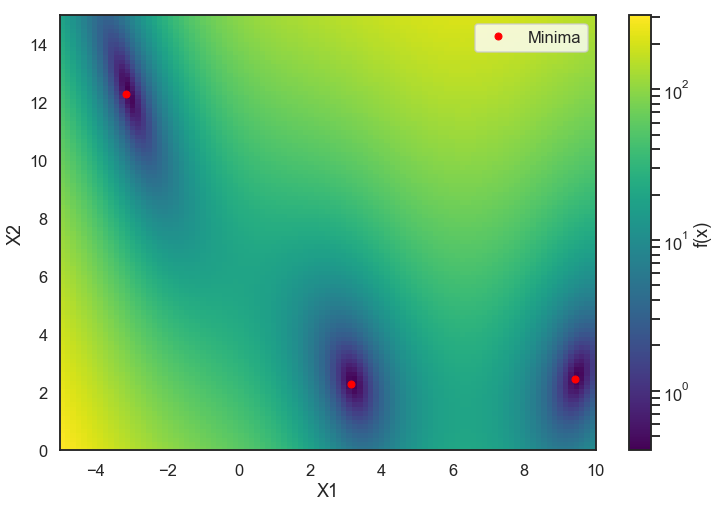

In [6]:
from matplotlib.colors import LogNorm

def plot_branin_with_minima():
    fig, ax = plt.subplots(figsize = (12,8))

    x1_values = np.linspace(-5, 10, 100)
    x2_values = np.linspace(0, 15, 100)
    x_ax, y_ax = np.meshgrid(x1_values, x2_values)
    vals = np.c_[x_ax.ravel(), y_ax.ravel()]
    fx = np.reshape([branin(val) for val in vals], (100, 100))

    cm = ax.pcolormesh(x_ax, y_ax, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("f(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

plot_branin_with_minima()

In [7]:
ntrain = 50 # number of initial training points
d = 2 # number of dimensions of the input features

X_train_norm = lhs(2, samples= ntrain, criterion='maximin') # Initial training points
X_train = np.zeros(X_train_norm.shape)
X_train[:,0] = X_train_norm[:,0]*15 - 5.
X_train[:,1] = X_train_norm[:,1]*15
Y_train = neg_branin(X_train.T)
bounds = [(-5.0, 10.0), (0.0, 15.0)]

In [8]:
Xx = X_train
Yy = Y_train

In [9]:
opt = Optimizer(bounds, base_estimator="rf", acq_func = 'qEI',
                acq_optimizer = 'sampling', random_state = 123)

qEI aquisition function (parallel BGO) is still under development
----------------------------------------
Right now, it can only be used with sampling acq_optimizer


In [10]:
opt.base_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=3,
           min_samples_split=2, min_variance=0.0,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=843828734, verbose=0,
           warm_start=False)

In [14]:
qei_args_dict = {'num_sampled_points': 3,
               'num_batches_eval' : 4000,
               'strategy_batch_selection' : 'random'}

In [15]:
#np.seterr(all='raise')

we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
2.9189696082800394
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
2.3895846231027944
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
6.9069007840153684
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
3.6047440614856283
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
4.139819634391664
we are here :: qEI or RuiEI
When tell() is called with qEI or RuiEI aquisition function ,we are just fitting the model and nothing more.
max
3.283543594952297
we are here :: qEI or RuiEI
When tell() is

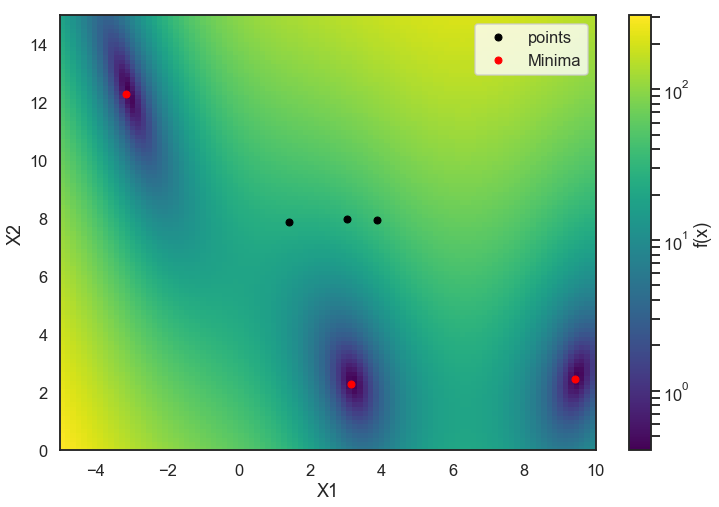

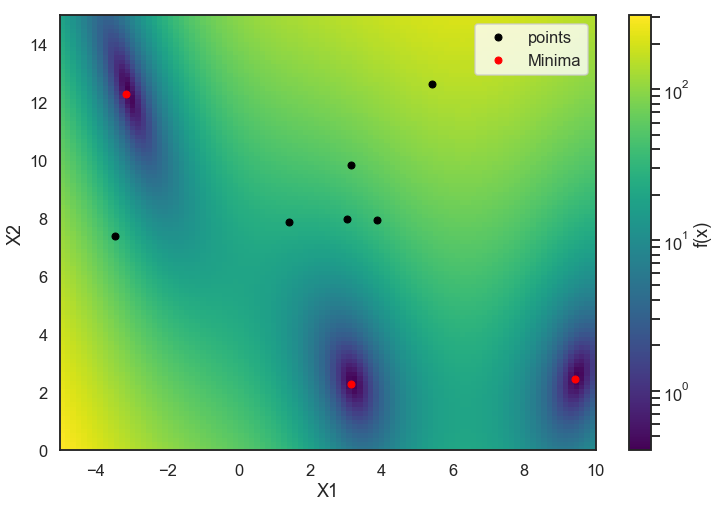

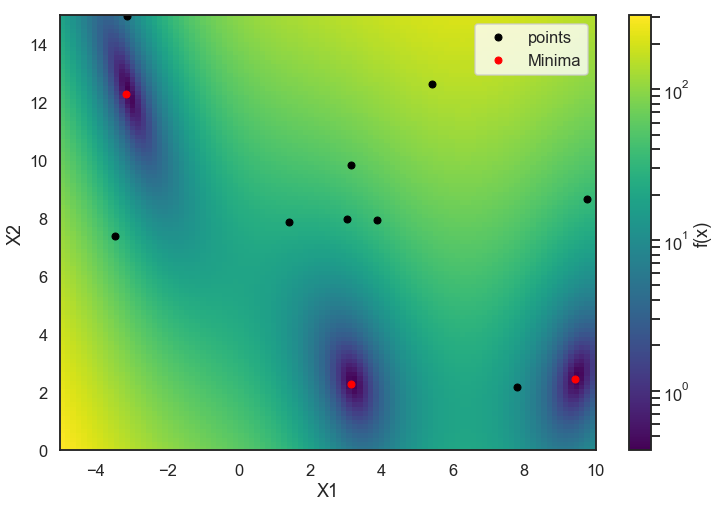

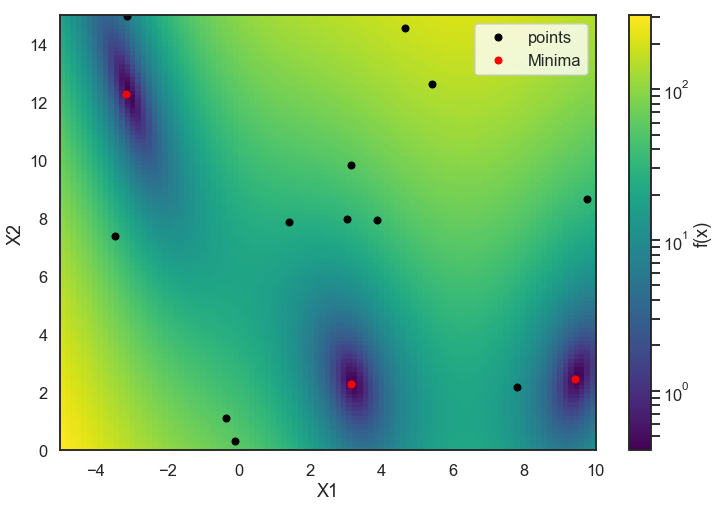

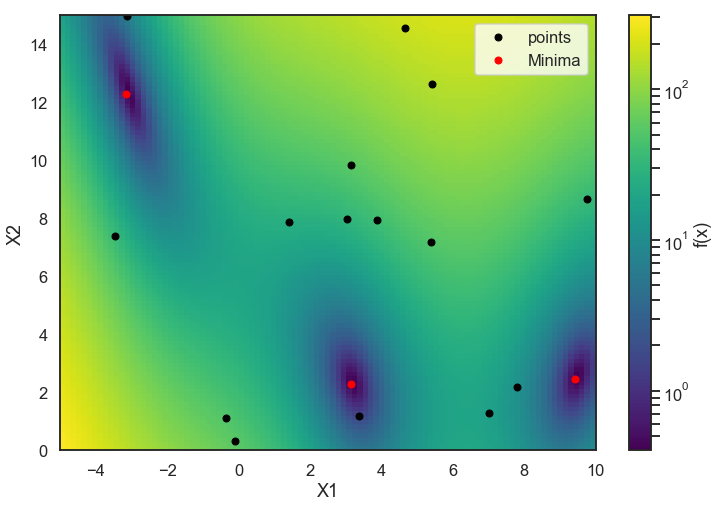

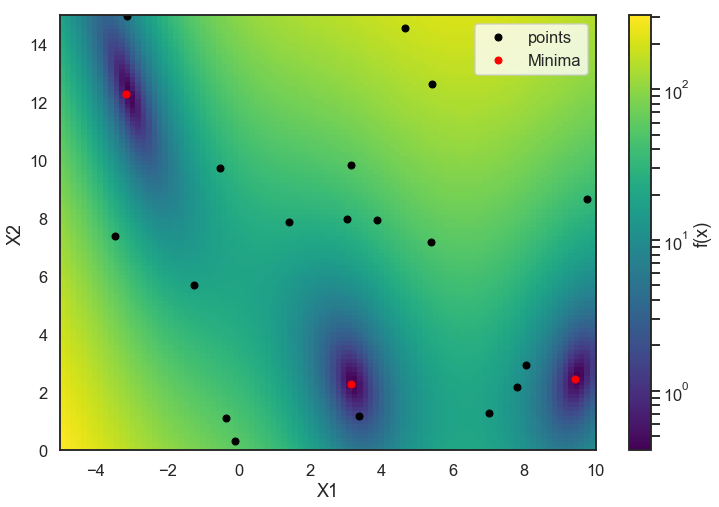

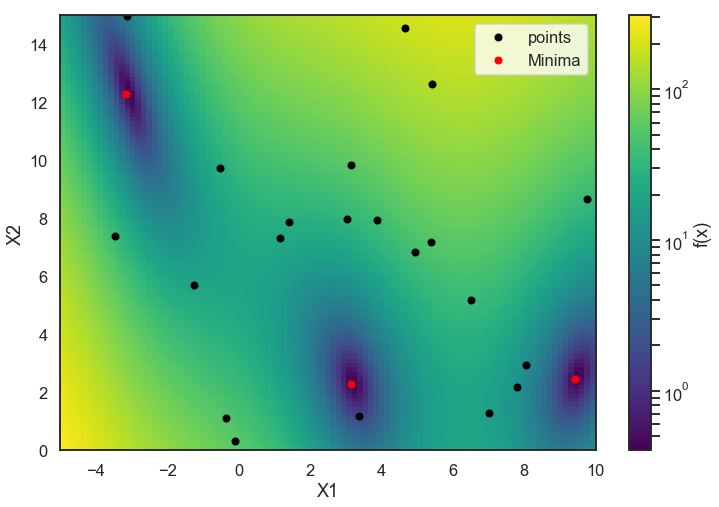

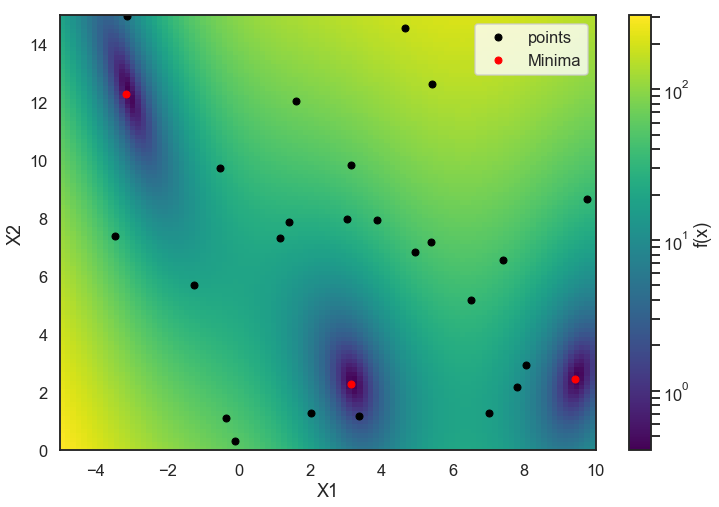

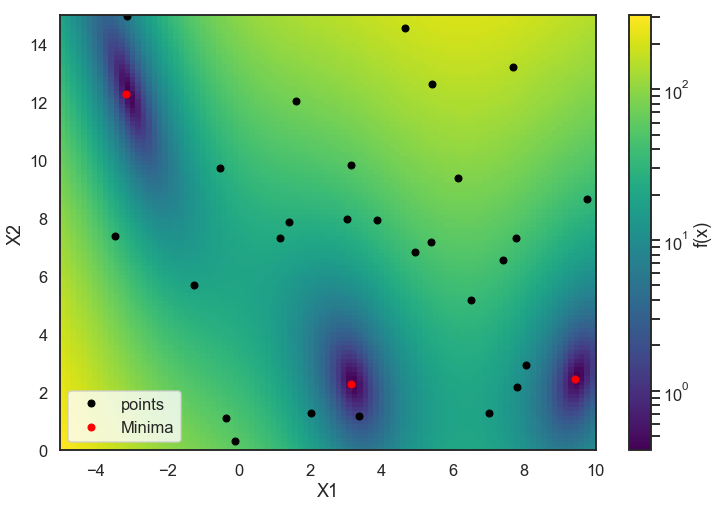

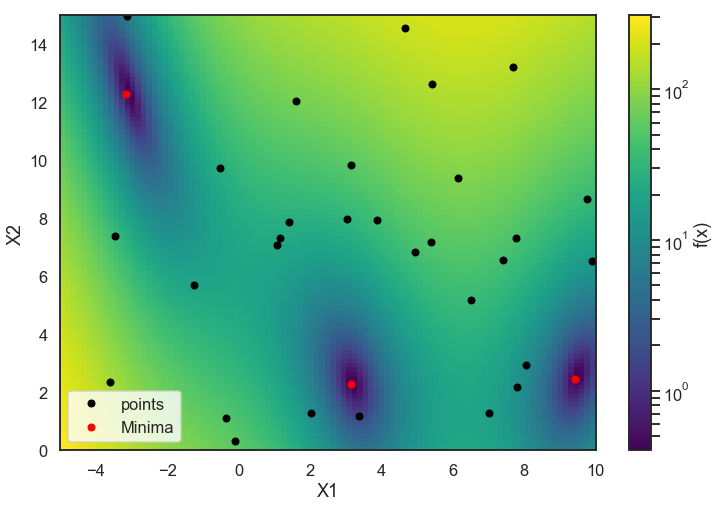

In [16]:
iteration = 10
total_evals = np.empty(shape = 2)
for i in range(iteration):
    opt.tell(Xx.tolist(), Yy.tolist())
    nxt_eval = opt.ask(additional_acq_func_kwargs = qei_args_dict)
    nxt_eval = np.array(nxt_eval)
    Xx = np.vstack([Xx, nxt_eval])
    y = neg_branin(nxt_eval.T)
    Yy = np.append(Yy, y)
    total_evals = np.vstack([total_evals,nxt_eval])
    plot_branin_with_points(total_evals)

Other estimators are not compatible with "qEI" since as of now, qEI needs covariance matrix. Is there any way to change this to variance or standard deviation at test points?


In [34]:
model = opt.models[-1]

In [64]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

In [65]:
x_model = opt.space.transform(X_grid.tolist())

In [46]:
y_pred, sigma = model.predict(x_model, return_std=True)

In [73]:
def plot_branin_pred(y_pred, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(y_pred, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=2, 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("m(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])
    
    
def plot_branin_var(sigma, x1_values, x2_values):
    fig, ax = plt.subplots(figsize = (12,8))
    fx = np.reshape(sigma, (100, 100))
    cm = ax.pcolormesh(x1_values, x2_values, fx,
                       norm=LogNorm(vmin=fx.min(), 
                                    vmax=fx.max()))

    minima = np.array([[-np.pi, 12.275], [+np.pi, 2.275], [9.42478, 2.475]])
    ax.plot(minima[:, 0], minima[:, 1], "r.", markersize=14, lw=0, label="Minima")

    cb = fig.colorbar(cm)
    cb.set_label("sigma(x)")

    ax.legend(loc="best", numpoints=1)

    ax.set_xlabel("X1")
    ax.set_xlim([-5, 10])
    ax.set_ylabel("X2")
    ax.set_ylim([0, 15])

ValueError: Data has no positive values, and therefore can not be log-scaled.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x114f6dae8> (for post_execute):


ValueError: values must all be positive

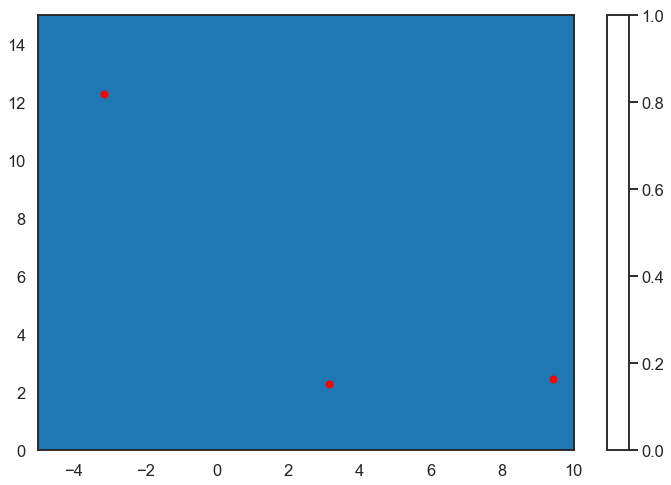

In [49]:
y_pred

array([-212.34047164, -216.04733449, -216.04733449, ..., -143.32281993,
       -143.32281993, -143.32281993])

In [50]:
Y_train.shape

(50,)

In [51]:
x_model = opt.space.transform(X_train.tolist())

In [52]:
y_pred, sigma = model.predict(x_model, return_std=True)

# Training predictions

In [55]:
y_pred

array([ -38.00476297,   -6.88772537,   -3.84769098,  -46.59864996,
       -105.78115797,  -17.26039895,  -57.94172046,  -12.97811763,
        -37.08056239,  -33.42835471, -138.778057  ,  -44.41353045,
        -20.17648984,  -15.83438464,  -16.37311789,  -21.46628081,
       -177.92131788, -101.88955032,  -59.29972412,  -17.42976814,
        -28.97869897, -138.04815144,  -47.54249284,  -15.39186586,
        -28.03105857,  -60.11433157,  -17.99784872, -113.18550174,
        -43.29446292,  -98.12992219,  -26.65863116, -170.3432751 ,
        -30.36408375,  -20.26541964,   -9.17829876,   -3.83218899,
         -7.01821186,   -0.45499341,  -87.93576365,  -55.30714978,
       -171.20195916,  -84.20188631,  -26.94609056,  -70.32490478,
       -218.07823256,  -53.31547365,  -39.3361641 ,  -11.68385873,
        -94.2446718 ,   -3.72747342])

In [56]:
Y_train

array([ -38.02139204,   -6.84686835,   -3.84769098,  -46.59864996,
       -106.03068841,  -17.26558586,  -57.94172046,  -12.99403395,
        -37.08600539,  -33.22398312, -138.778057  ,  -44.41353045,
        -20.17648984,  -15.83438464,  -16.37311789,  -21.60955363,
       -177.84822597, -101.88955032,  -59.36459719,  -17.42976814,
        -29.01136075, -137.9990274 ,  -47.63844269,  -15.39186586,
        -28.03105857,  -60.11433157,  -17.99784872, -113.18550174,
        -43.29446292,  -98.12992219,  -26.65863116, -170.3432751 ,
        -30.36408375,  -18.13490032,   -9.10906695,   -3.83218899,
         -6.91201808,   -0.45499341,  -87.91668479,  -53.59800883,
       -171.20195916,  -84.1924601 ,  -26.90390004,  -70.32490478,
       -218.07823256,  -53.36640107,  -39.32534174,  -11.68385873,
        -94.2446718 ,   -3.72747342])

In [66]:
x1_values = np.linspace(-5, 10, 100)
x2_values = np.linspace(0, 15, 100)
x_ax, y_ax = np.meshgrid(x1_values, x2_values)
X_grid = np.zeros(shape = (x_ax.ravel().shape[0], 2))
X_grid[:,0] = x_ax.ravel()
X_grid[:,1] = y_ax.ravel()

In [67]:
x_model = opt.space.transform(X_grid.tolist())

In [62]:
y_grid = neg_branin(X_grid.T)

In [63]:
y_grid

array([-308.12909601, -291.98078372, -276.3728092 , ..., -151.69300385,
       -148.7334931 , -145.87219088])

In [68]:
y_pred_test, sigma_test = model.predict(x_model, return_std=True)

In [71]:
y_pred_test

array([-212.34047164, -216.04733449, -216.04733449, ..., -143.32281993,
       -143.32281993, -143.32281993])

In [72]:
pos_y_pred = -1*y_pred_test

# Grid point predictions

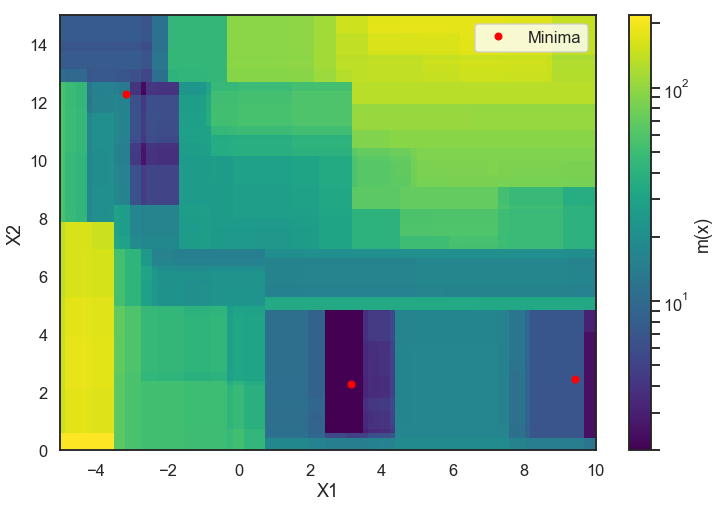

In [74]:
plot_branin_pred(pos_y_pred, x1_values, x2_values)

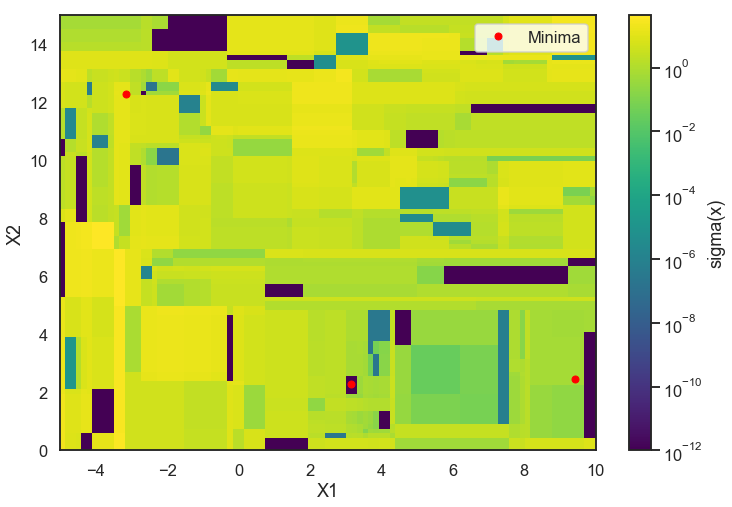

In [77]:
plot_branin_var(sigma_test +1e-12, x1_values, x2_values)

In [76]:
sigma

array([3.20051703e-01, 3.55436331e-01, 2.34663721e-07, 2.86102295e-06,
       2.63150834e+00, 2.94012079e-02, 3.56832255e-06, 1.68035515e-01,
       7.83527062e-02, 7.07203625e-01, 1.00927403e-05, 0.00000000e+00,
       9.83024985e-07, 6.95103633e-07, 0.00000000e+00, 5.62326387e-01,
       5.96169382e-01, 0.00000000e+00, 8.11413435e-01, 0.00000000e+00,
       2.73490833e-01, 6.85796023e-01, 4.13153513e-01, 0.00000000e+00,
       0.00000000e+00, 3.23406696e-06, 0.00000000e+00, 5.04637015e-06,
       0.00000000e+00, 0.00000000e+00, 1.06624030e-06, 0.00000000e+00,
       1.90734863e-06, 6.78363293e+00, 2.33370444e-01, 2.02129185e-07,
       5.60809752e-01, 0.00000000e+00, 8.27945519e-02, 6.23185546e+00,
       7.62939453e-06, 1.96425801e-01, 4.93636203e-01, 6.25366070e-06,
       0.00000000e+00, 7.23217206e-01, 3.90055782e-01, 0.00000000e+00,
       0.00000000e+00, 2.23020159e-07])